# 데이터 시각화가 필요한 이유

* 앤스콤 4분할 데이터(anscombe' quartet)는 데이터 시각화의 중요성을 보여주는 전형적이 사례이다.
* 영국의 프랭크 앤스콤이 데이터를 시각화 하지 않고 수치에만 의존할 때 발생하는 함정을 보여주기 위한 데이터 이다.
* 해당 데이터는 4개의 그룹으로 구성되어 있으며 모든 데이터 그룹이 x, y 값을 가지고 있다. 
* 이 4개 그룹은 각각 평균, 분산, 상관관계, 회귀선이 같다는 특징이 있다.
* 수치 결과만 보면 4개 그룹의 데이터가 서로 같을 것이라고 착각할 수 있다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [2]:
anscombe = pd.read_csv("../02ml/data/anscombe.csv")

In [3]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


**기술통계량을 확인해 보면 4개 그룹의 수치적 요약값이 같은 것을 알 수 있다.**

In [4]:
anscombe.groupby('dataset').agg(['mean','std'])

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

# 산점도로 시각화 해보기
각 그룹을 비교하기 위한 시각화

In [5]:
dataset1 = anscombe[anscombe['dataset']=='I']
dataset2 = anscombe[anscombe['dataset']=='II']
dataset3 = anscombe[anscombe['dataset']=='III']
dataset4 = anscombe[anscombe['dataset']=='IV']

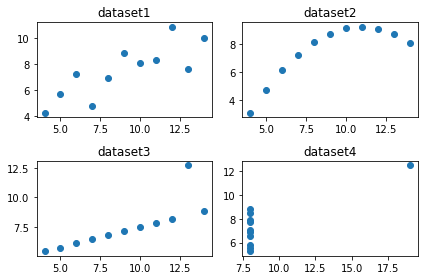

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(dataset1['x'], dataset1['y'], 'o'); ax1.set_title('dataset1')
ax2.plot(dataset2['x'], dataset2['y'], 'o'); ax2.set_title('dataset2')
ax3.plot(dataset3['x'], dataset3['y'], 'o'); ax3.set_title('dataset3')
ax4.plot(dataset4['x'], dataset4['y'], 'o'); ax4.set_title('dataset4')

fig.tight_layout()
plt.show()

* 평균, 분산, 상관관계 등의 통계적 수치가 같아도 그래프의 형태는 다를 수 있다.
* 데이터 분석시 수치에만 의존하면 잘못된 판단을 할 수 있다.

# Matplotlib 실습
먼저 matplotlib.pyplot을 import한다. 실습에 필요한 numpy도 import한다.  
jupyter notebook에서 plot이 바로 표시 될 수 있도록 매직 명령어를 사용한다. 
> %matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

간단히 다음과 같은 sine 함수 그래프와 cosine함수 그래프를 그려보자.

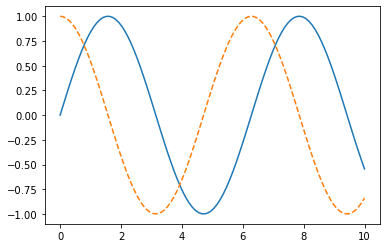

In [8]:
x = np.linspace(0,10,100) # 0~10 등분을 해서 숫자 100개 생성

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

subplot 기능을 활용하여 sine함수와 cosine함수 그래프를 다음과 같이 그려보자

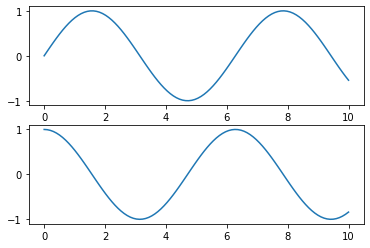

In [9]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(x, np.sin(x))

plt.subplot(212)
plt.plot(x, np.cos(x))

플롯의 선 색상과 스타일을 다음과 같이 바꾸어서 그려보자.
- color : r,g,b,c,y,m,k,w
- linestyle : -, --, :, o, ^ 

In [3]:
?plt.plot 

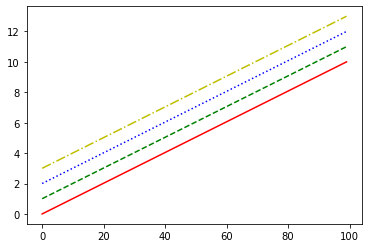

In [11]:
plt.plot(x, 'r-')
plt.plot(x+1, 'g--')
plt.plot(x+2, 'b:')
plt.plot(x+3, 'y-.')

plt.xlim()과 plt.ylim() 을 사용하여 x축과 y축을 제한 할 수 있다.  
sine 그래프를 그리고 x축을 -1 ~ 11로 하고 y축을 -1.5 ~ 1.5로 나타내 보자.

(-1.5, 1.5)

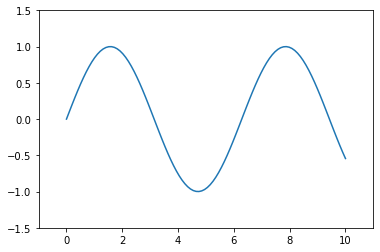

In [12]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

x축과 y축의 비율을 동일하게 맞출 수 있다. 

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

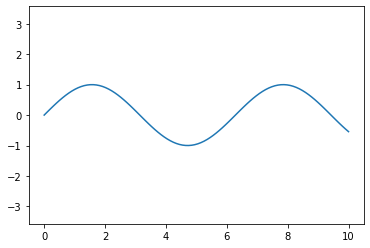

In [13]:
plt.plot(x, np.sin(x))
plt.axis('equal')

x축과 y축에 label을 추가하고 그래프의 제목을 추가한다.

Text(0, 0.5, 'sin(x)')

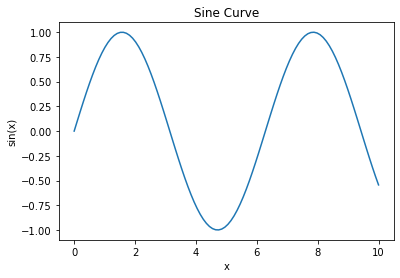

In [14]:
plt.plot(x, np.sin(x))
plt.title('Sine Curve')
plt.xlabel('x')
plt.ylabel('sin(x)')

Legend의 표시  
각 그래프 선에 대해서 label을 붙이고 그래프에서 legend로 표시한다.  
legend loc 옵션 : 'upper right', 'upper left', 'lower left','lower right' 등으로 위치 지정 가능하다.

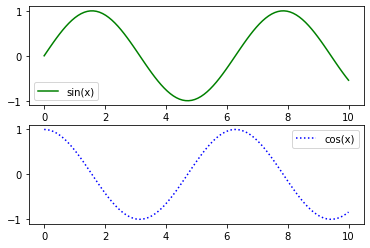

In [15]:

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), '-g', label ='sin(x)')
plt.legend(loc='lower left')
plt.subplot(2,1,2)
plt.plot(x, np.cos(x), ':b', label ='cos(x)')
plt.legend()

### 다중 서브플롯
* 서로 다른 데이터 뷰를 비교
* plt.subplot : 간단한 서브플롯의 그리드
* plt.tight_layout() : 서브플롯 간격유지

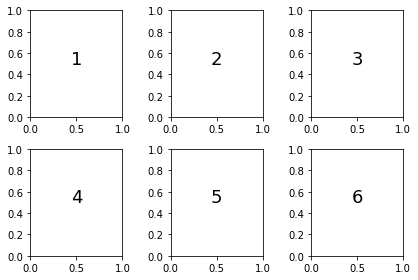

In [6]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5, 0.5, str(i), fontsize=18, ha='center')
plt.tight_layout() # 축 겹치지 않게 재배치

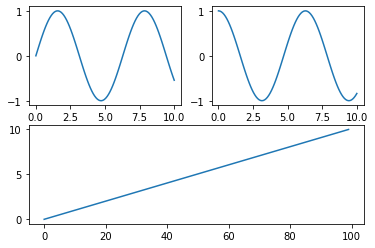

In [17]:
plt.subplot(2,2,1); plt.plot(x, np.sin(x))
plt.subplot(2,2,2); plt.plot(x, np.cos(x))
plt.subplot(2,1,2); plt.plot(x)

plt.show()

# Matplotlib로 다양한 그래프 그리기

In [7]:
# Data Loading

iris = pd.read_csv("../02ml/data/iris.csv")
tips = pd.read_csv("../02ml/data/tips.csv")

### matplotlib에서 히스토그램 그리기
* 도수 분포표를 시각화 한 것.
* 연속형 변수의 구간별 도수를 막대의 길이로 나타내는 그래프
* 데이터 분석 단계에서 변수의 분포, 중심 경향, 퍼짐 정도, 치우침 정도 등을 한눈에 살펴볼 수 있는 시각화 종류로 히스토그램이 많이 사용


 bins=x 값을 변경해가면서 여러번 시도해 본다.

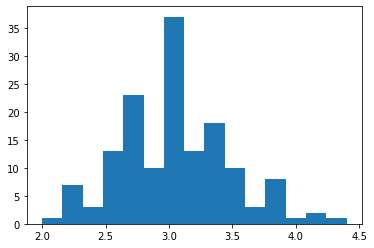

In [11]:
plt.hist(iris['sepal_width'], bins=15)
plt.show()

Y축을 빈도수(frequency)가 아니라 density로 하고 싶을 때는 density=True 를 설정

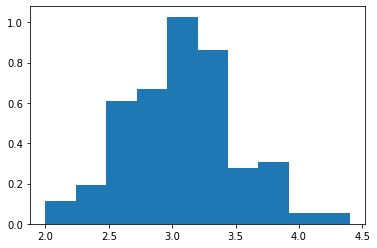

In [20]:
plt.hist(iris['sepal_width'], bins=10, density=True)
plt.show()

### matplotlib으로 막대 그리프 그리기
요일(day)별로 tip 의 합계를 구해서 막대 그래프로 비교

In [21]:
import numpy as np

tips_sum_by_day = tips.groupby('day').tip.sum().sort_values()  # 막대그래프를 크기 순서로 정렬
tips_sum_by_day

day
Fri      51.96
Thur    171.83
Sun     247.39
Sat     260.40
Name: tip, dtype: float64

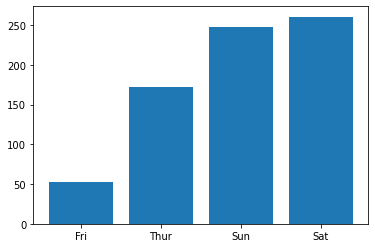

In [22]:
label = tips_sum_by_day.index
index = np.arange(len(label))

plt.bar(label, tips_sum_by_day)

plt.show()

**옆으로 누운 막대그래프는 plt.barh() 함수를 사용**

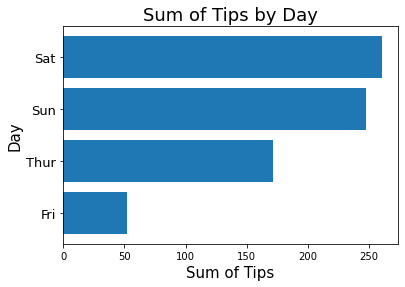

In [23]:
plt.barh(index, tips_sum_by_day)
plt.title('Sum of Tips by Day', fontsize=18)
plt.ylabel('Day', fontsize=15)
plt.xlabel('Sum of Tips', fontsize=15)
plt.yticks(index, label, fontsize=13, rotation=0)
plt.show()

### 그룹으로 나누어 비교하는 막대그래프
성별(sex)에 따라 요일별 tip의 평균을 비교한다.

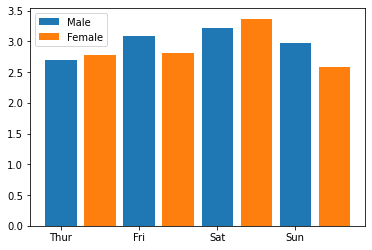

In [24]:
tips_mean_by_day_male = tips[tips['sex'] == 'Male'].groupby('day').tip.mean()
tips_mean_by_day_female = tips[tips['sex'] == 'Female'].groupby('day').tip.mean()

label = ['Thur', 'Fri', 'Sat', 'Sun']
index = np.arange(len(label))

plt.bar(index, tips_mean_by_day_male, width=0.4, label='Male')
plt.bar(index+0.5, tips_mean_by_day_female, width=0.4, label='Female')

plt.xticks(index, label)
plt.legend()
plt.show()


### 누적막대그래프로 표시하기

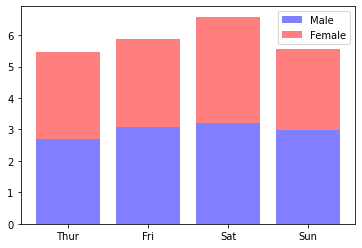

In [25]:
# summary by group

p1 = plt.bar(index, tips_mean_by_day_male, color='b', alpha=0.5, label='Male')
p2 = plt.bar(index, tips_mean_by_day_female, color='r', alpha=0.5,
             bottom=tips_mean_by_day_male, label='Female')

plt.xticks(index, label)
plt.legend()
plt.show()

### Matplotlib를 이용하여 산점도 그리기

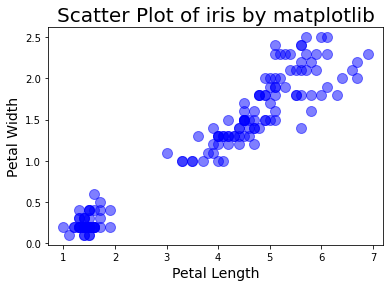

In [26]:
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)

plt.title('Scatter Plot of iris by matplotlib', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()

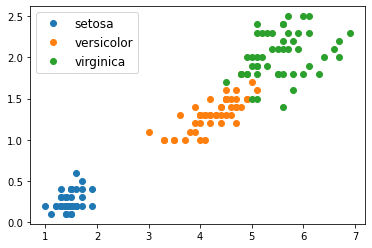

In [27]:
# 그룹별 산점도 그리기 
groups = iris.groupby('species')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.petal_length, 
            group.petal_width, 
            marker='o', 
            linestyle='',
            label=name)
ax.legend(fontsize=12, loc='upper left') # legend position


### plot()함수와 scatter()함수 차이
plot()대신에 scatter()를 써서 산점도를 그리는 것도 가능하다.

plot()함수 역시 마커만 보여주는 플롯이 가능하고 속도도 scatter()함수에 비해 더 빠르다. 
  하지만, 마커를 그리는데 있어 scatter()함수는 plot()함수에서 제공하지 않는 높은 자유도를 제공하며 다양한 플롯을 그리는 것이 기능하다.

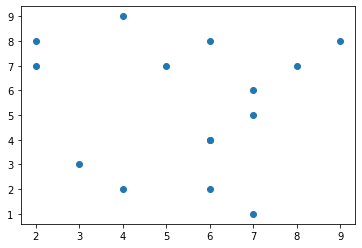

In [28]:
x = np.random.randint(1,10,15)
y = np.random.randint(1,10,15)

plt.plot(x, y,'o')

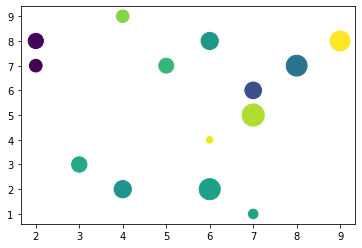

In [29]:
size = np.random.randint(1,500,15)
color =  np.random.randint(1,100,15)
plt.scatter(x,y, s=size, c=color)

Text(0, 0.5, 'Tip')

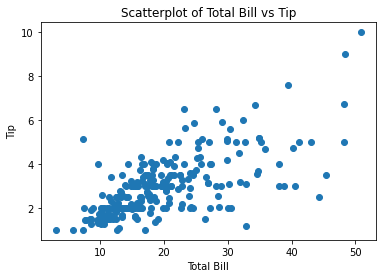

In [30]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(tips['total_bill'], tips['tip']) 
axes1.set_title('Scatterplot of Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')

### 상자 그래프 그리기
하나의 연속형 변수에 대해서 분포 형태, 퍼짐정도, 이상치 여부 등을 시각화하고, 하나의 그룹 혹은 여러개의 그룹 간 비교하는데 유용하다.

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

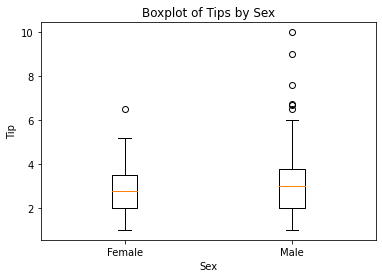

In [31]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot( 
    [tips[tips['sex'] == 'Female']['tip'], 
     tips[tips['sex'] == 'Male']['tip']], 
    labels=['Female', 'Male'])


axes1.set_xlabel('Sex') 
axes1.set_ylabel('Tip') 
axes1.set_title('Boxplot of Tips by Sex')

# 등고선 그래프 contour

* 등고선 그래프로 3차원 데이터를 시각화 할 수 있다.
* contour는 등고선만 표시하고 contourf는 색깔로 표시한다.

### meshgrid와 contour
* plt.contour(X, Y, Z)의 X, Y, Z는 모두 2차원의 np.array이다.
* X, Y 를 meshgrid를 사용하여 생성한다.

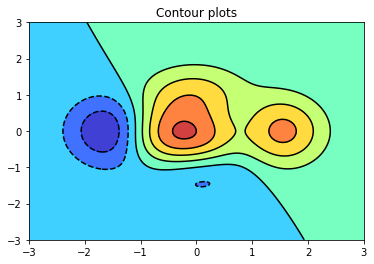

In [32]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)


n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
XX, YY = np.meshgrid(x, y)
ZZ = f(XX, YY)

plt.title("Contour plots")
plt.contourf(XX, YY, ZZ, alpha=.75, cmap='jet')
plt.contour(XX, YY, ZZ, colors='black')
plt.show()